In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Setup

## 1.1 Import Dependencies

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.2 Create Subfolder

In [5]:
base = '/content/drive/MyDrive/Colab Notebooks/Face/'
base_path = '/content/drive/MyDrive/Colab Notebooks/Face/'

In [ ]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

base = '/content/drive/MyDrive/Colab Notebooks/Face/'

In [ ]:
# Make the directories
os.makedirs(base + POS_PATH,exist_ok=True)
os.makedirs(base + NEG_PATH,exist_ok=True)
os.makedirs( base + ANC_PATH,exist_ok=True)

# 2. Collect Positive, Negative and Anchor

2.1 Untar labelled faces of *Wild* Dataset

In [ ]:
!tar -xf '/content/drive/MyDrive/Colab Notebooks/Face/lfw.tgz'

tar: /content/drive/MyDrive/Colab Notebooks/Face/lfw.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
# Moving labelled faces of wild to data/negative directory

for directory in os.listdir(base + 'lfw'):                           #<---Done one time---->
  for file in os.listdir(os.path.join(base,'lfw',directory)):
    EX_DIR = os.path.join(base,'lfw',directory,file)
    NEW_DIR = os.path.join(base,NEG_PATH,file)
    os.replace(EX_DIR,NEW_DIR)

### We are adding these file in negative

# 2.2 Collect Positive and Anchor Images

In [ ]:
# Establish a connection to webcam

cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret, frame = cap.read()

  # Show back to the screen
  cv2.imshow("Image collection",frame)

  # Breaking Gracefully
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import uuid

In [ ]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

base = '/content/drive/MyDrive/Colab Notebooks/Face/'

## 2.2.1. Caputuring Anchor Images

In [ ]:

# Directory to save images
save_dir = os.path.join(base, ANC_PATH)
os.makedirs(save_dir, exist_ok=True)

try:
    num_images = 150
    for img_count in range(1, num_images + 1):
        filename = os.path.join(save_dir, f'{uuid.uuid4()}.jpg')

        # Remove the event listener to capture automatically
        js = Javascript('''
        async function takePhoto(quality) {
            return new Promise((resolve, reject) => {
                const div = document.createElement('div');
                const video = document.createElement('video');
                video.style.display = 'block';
                video.width = 250;  // Set the width of the video element
                video.height = 250; // Set the height of the video element
                const stream = navigator.mediaDevices.getUserMedia({video: true});

                stream.then((stream) => {
                    document.body.appendChild(div);
                    div.appendChild(video);
                    video.srcObject = stream;
                    video.play();

                    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

                    let data = '';
                    const canvas = document.createElement('canvas');
                    canvas.width = 250;  // Set the width of the canvas
                    canvas.height = 250; // Set the height of the canvas

                    // Capture without waiting for user interaction
                    video.addEventListener('loadeddata', () => {
                        canvas.getContext('2d').drawImage(video, 0, 0, 250, 250);
                        stream.getVideoTracks()[0].stop();
                        data = canvas.toDataURL('image/jpeg', quality);
                        div.remove();
                        resolve(data); // Resolve the promise with the captured data
                    });
                }).catch((error) => {
                    reject(error);
                });
            });
        }
        ''')
        display(js)

        # Capture image automatically without user interaction
        try:
            data = eval_js('takePhoto({})'.format(1.0))  # Set the desired quality

            # Check if data is not None and contains the expected comma
            if data and ',' in data:
                binary = b64decode(data.split(',')[1])
                with open(filename, 'wb') as f:
                    f.write(binary)
                print(f"Captured {filename} - {img_count}/{num_images}")
            else:
                # Handle the case where no image was captured
                print("No image was captured.")
                break
        except Exception as e:
            print(f"Error during image capture: {e}")
            break

        # Close the camera after capturing each image
        js_close = Javascript('closeCamera();')
        display(js_close)

except Exception as e:
    print(f"An error occurred during image capture or processing: {e}")
finally:
    # Close the camera when capturing is done or interrupted
    js_close_all = Javascript('closeCamera();')
    display(js_close_all)


<IPython.core.display.Javascript object>

Captured /content/drive/MyDrive/Colab Notebooks/Face/data/anchor/abf7c55e-2f00-4cdf-aa72-d9f7f20d3dad.jpg - 1/150


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.2.2. Capturing Positive Images

In [ ]:

# Directory to save images
save_dir = os.path.join(base, POS_PATH)
os.makedirs(save_dir, exist_ok=True)

try:
    num_images = 300
    for img_count in range(1, num_images + 1):
        filename = os.path.join(save_dir, f'{uuid.uuid4()}.jpg')

        # Remove the event listener to capture automatically
        js = Javascript('''
        async function takePhoto(quality) {
            return new Promise((resolve, reject) => {
                const div = document.createElement('div');
                const video = document.createElement('video');
                video.style.display = 'block';
                video.width = 250;  // Set the width of the video element
                video.height = 250; // Set the height of the video element
                const stream = navigator.mediaDevices.getUserMedia({video: true});

                stream.then((stream) => {
                    document.body.appendChild(div);
                    div.appendChild(video);
                    video.srcObject = stream;
                    video.play();

                    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

                    let data = '';
                    const canvas = document.createElement('canvas');
                    canvas.width = 250;  // Set the width of the canvas
                    canvas.height = 250; // Set the height of the canvas

                    // Capture without waiting for user interaction
                    video.addEventListener('loadeddata', () => {
                        canvas.getContext('2d').drawImage(video, 0, 0, 250, 250);
                        stream.getVideoTracks()[0].stop();
                        data = canvas.toDataURL('image/jpeg', quality);
                        div.remove();
                        resolve(data); // Resolve the promise with the captured data
                    });
                }).catch((error) => {
                    reject(error);
                });
            });
        }
        ''')
        display(js)

        # Capture image automatically without user interaction
        try:
            data = eval_js('takePhoto({})'.format(1.0))  # Set the desired quality

            # Check if data is not None and contains the expected comma
            if data and ',' in data:
                binary = b64decode(data.split(',')[1])
                with open(filename, 'wb') as f:
                    f.write(binary)
                print(f"Captured {filename} - {img_count}/{num_images}")
            else:
                # Handle the case where no image was captured
                print("No image was captured.")
                break
        except Exception as e:
            print(f"Error during image capture: {e}")
            break

        # Close the camera after capturing each image
        js_close = Javascript('closeCamera();')
        display(js_close)

except Exception as e:
    print(f"An error occurred during image capture or processing: {e}")
finally:
    # Close the camera when capturing is done or interrupted
    js_close_all = Javascript('closeCamera();')
    display(js_close_all)


# 3. Preprocessing



### 3.1. Get image directory

In [ ]:
anchor = tf.data.Dataset.list_files(base + ANC_PATH + '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(base + POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(base + NEG_PATH + '/*.jpg').take(300)



In [ ]:
dir_test = positive.as_numpy_iterator()

In [ ]:
dir_test.next()

b'/content/drive/MyDrive/Colab Notebooks/Face/data/positive/89536f33-94e9-46a8-93f7-088200df526f.jpg'

### 3.2. Preprocessing images- Resize and Scale

In [17]:
def preprocess(file_path):

  # Read in image from file path
  byte_img = tf.io.read_file(file_path)
  # Load in the image
  img = tf.io.decode_jpeg(byte_img)

  # Preprocessing steps - resizing image to 100x100x3
  img = tf.image.resize(img,(105,105))
  # Rescale  between 0 and 1
  img = img / 255.0

  return img


## 3.3. Create Labelled Dataset

In [ ]:
tf.ones_like([1,1,2,3,4,1222.00,1,2])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# (anchor,positive) => 1,1,1,1,1
# (anchor,negative) => 0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)



In [ ]:
ex = negatives.as_numpy_iterator()
neg = ex.next()
neg

(b'/content/drive/MyDrive/Colab Notebooks/Face/data/anchor/ea19401e-6f05-4eef-9e1e-6951f5650952.jpg',
 b'/content/drive/MyDrive/Colab Notebooks/Face/data/negative/Suzanne_Gaudet_0001.jpg',
 0.0)

In [ ]:
len(positives)

300

In [ ]:
positives_sample = positives.as_numpy_iterator()

In [ ]:
len(data)

600

In [ ]:
positives_sample.next()

(b'/content/drive/MyDrive/Colab Notebooks/Face/data/anchor/7cc866b0-e128-4832-800f-0971d4917c77.jpg',
 b'/content/drive/MyDrive/Colab Notebooks/Face/data/positive/7d5b881e-8eed-4d68-bc16-3371077d7ee6.jpg',
 1.0)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
example = samples.next()
example[0]

b'/content/drive/MyDrive/Colab Notebooks/Face/data/anchor/8c48ce7c-a970-4b39-a537-c24e8933ab67.jpg'

## 3.4. Build Train and Test Partition

In [ ]:
def preprocess_twin(input_img,validation_img,label):
  return (preprocess(input_img),preprocess(validation_img),label)

In [ ]:
res = preprocess_twin(*example)

In [ ]:
res = preprocess_twin(*neg)

In [ ]:
len(res[0])

105

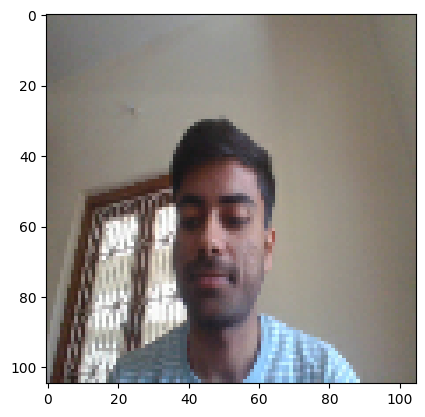

In [ ]:
plt.imshow(res[0])

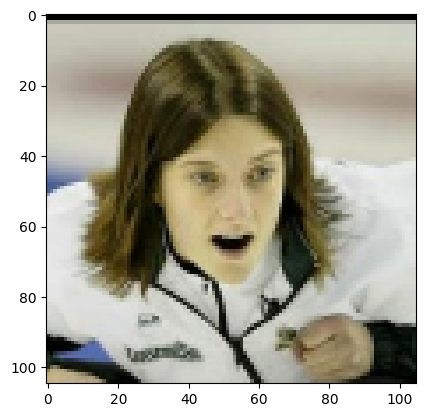

In [ ]:
plt.imshow(res[1])

In [ ]:
res[2]

0.0

In [ ]:
# Build dataloader pipeline

data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size = 1024)

In [ ]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
sample = data.as_numpy_iterator()


In [ ]:
sam = sample.next()

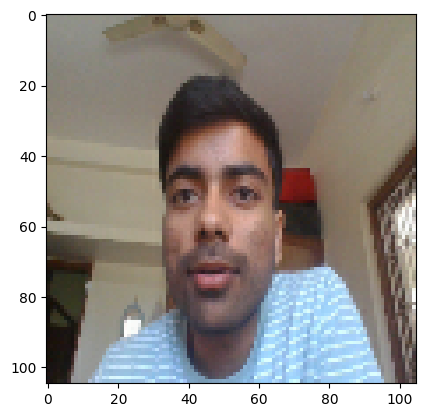

In [ ]:
plt.imshow(sam[0])

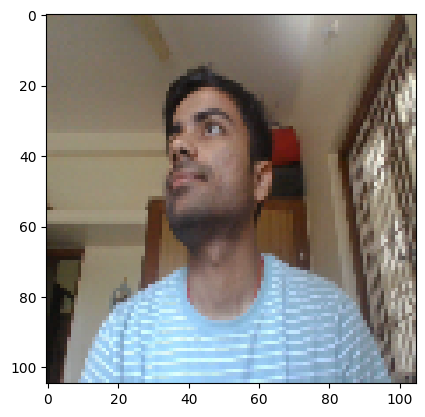

In [ ]:
plt.imshow(sam[1])

In [ ]:
sam[2]

1.0

In [ ]:
round(len(data)*.7)

420

In [ ]:
# Training partition

train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
len(train_data)

27

In [ ]:
26.25*16

420.0

In [ ]:
27 * 16

432

In [ ]:
train_samples = train_data.as_numpy_iterator()
train_sample = train_samples.next()


In [ ]:
len(train_sample)

3

In [ ]:
# Testing partition

test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Enginnering

## 4.1. Build Embedding Layer

In [ ]:
inp = Input(shape=(105,105,3),name="input_layer")
inp

<KerasTensor: shape=(None, 105, 105, 3) dtype=float32 (created by layer 'input_layer')>

In [ ]:
c1 = Conv2D(64,(10,10),activation='relu')(inp)
c1

<KerasTensor: shape=(None, 96, 96, 64) dtype=float32 (created by layer 'conv2d')>

In [ ]:
m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
m1

<KerasTensor: shape=(None, 48, 48, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [ ]:
c2 = Conv2D(128,(7,7),activation='relu')(m1)
c2


<KerasTensor: shape=(None, 42, 42, 128) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
m2 = MaxPooling2D(64,(2,2),padding='same')(c2)
m2

<KerasTensor: shape=(None, 21, 21, 128) dtype=float32 (created by layer 'max_pooling2d_1')>

In [ ]:
c3 = Conv2D(128,(4,4),activation='relu')(m2)
c3

<KerasTensor: shape=(None, 18, 18, 128) dtype=float32 (created by layer 'conv2d_2')>

In [ ]:
m3 = MaxPooling2D(64,(2,2),padding='same')(c3)
m3

<KerasTensor: shape=(None, 9, 9, 128) dtype=float32 (created by layer 'max_pooling2d_2')>

In [ ]:
c4 = Conv2D(256,(4,4),activation='relu')(m3)
c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_3')>

In [ ]:
6*6*256  #<---c4 layer get flatten --->

9216

In [ ]:
f1 = Flatten()(c4)
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [ ]:
d1 = Dense(4096,activation='sigmoid')(f1)
d1

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [ ]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')
mod

In [ ]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

In [6]:
def make_embedding():
  inp = Input(shape=(105,105,3),name="input_layer")

  # First block
  c1 = Conv2D(64,(10,10),activation='relu')(inp)
  m1 = MaxPooling2D(64,(2,2),padding='same')(c1)

  # Second block
  c2 = Conv2D(128,(7,7),activation='relu')(m1)
  m2 = MaxPooling2D(64,(2,2),padding='same')(c2)

  # Third block
  c3 = Conv2D(128,(4,4),activation='relu')(m2)
  m3 = MaxPooling2D(64,(2,2),padding='same')(c3)

  # Final embedding block
  c4 = Conv2D(256,(4,4),activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096,activation='sigmoid')(f1)

  return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 21, 21, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 128)       26

## 4.2 Build Distance layer

In [7]:
# Siamese L1 Distance class
class L1Dist(Layer):

  # Init method - inheritance
  def __init__(self,**kwargs):
    super().__init__()

  # Magic happens here --> similarity calculation
  def call(self,input_embedding,validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

In [8]:
l1 = L1Dist()

In [ ]:
anchor_image = Input(name='anchor_img',shape=(105,105,3))
validation_image = Input(name='validation_img',shape=(105,105,3))

In [ ]:
anchor_embedding = embedding(anchor_image)
validation_embedding = embedding(validation_image)

In [ ]:
l1(anchor_embedding, validation_embedding)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist')>

## 4.3 Make Siamese Model

In [ ]:
input_image = Input(name='input_img',shape=(105,105,3))
validation_image = Input(name='validation_img',shape=(105,105,3))


In [ ]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [ ]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [ ]:
siamene_layer = L1Dist()

In [ ]:
# As passing those embedding to siamene_layer we get a difference embedding
# now we need to figure are these embedding are enough to say
# are they similar or different

siamene_layer(inp_embedding,val_embedding)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist_1')>

In [ ]:
distances = siamene_layer(inp_embedding,val_embedding)

In [ ]:
classifier = Dense(1,activation='sigmoid')(distances)


In [ ]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [ ]:
simesenetwork = Model(inputs=[input_image,validation_image], outputs =classifier, name='SiameseNetwork')

In [ ]:
simesenetwork.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Siamese Model

In [ ]:
def make_siamese_model():

  # Anchor image input in the network
  input_image = Input(name='input_img',shape=(105,105,3))

  # Validation image in the network
  validation_image = Input(name='validation_img',shape=(105,105,3))

  # Combine siamese distance components
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_image),embedding(validation_image))

  # Classification layer
  classifier = Dense(1,activation='sigmoid')(distances)

  return Model(inputs=[input_image,validation_image], outputs =classifier, name='SiameseNetwork')



In [ ]:
siamese_model = make_siamese_model()

NameError: name 'embedding' is not defined

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4)   # learning rate -- 0.0001

## 5.2 Establish Checkpoints

In [ ]:
checkpoint_dir = os.path.join(base, 'training_checkpoints')
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt = opt, siamese_model = siamese_model)

## 5.3 Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()

In [ ]:
batch_1 = test_batch.next()

In [ ]:
batch_1[0].shape

(16, 105, 105, 3)

In [ ]:
len(batch_1[0])

16

In [ ]:
batch_1[1].shape

(16, 105, 105, 3)

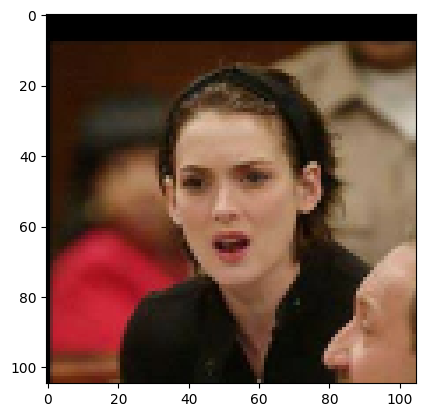

In [ ]:
plt.imshow(batch_1[1][1])

In [ ]:
batch_1[2]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [ ]:
batch_1[2].shape

(16,)

In [ ]:
X = batch_1[:2]

In [ ]:
np.array(X).shape

(2, 16, 105, 105, 3)

In [ ]:
y = batch_1[2]

In [ ]:
y

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [ ]:
@tf.function

def train_step(batch):

  # Record all of our operations
  with tf.GradientTape() as tape:
    # Get anchor and positive/negative image
    X = batch[:2]
    # Get label
    y = batch[2]

    # Forward pass
    yhat = siamese_model(X,training = True)
    # Calculate loss
    loss = binary_cross_loss(y, yhat)

  print(loss)

  # Calculate gradients
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  # Calculate updated weights and apply to siamese model
  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

  return loss

## 5.4 Build Training loop

In [ ]:
def train(data,EPOCHS):
  # Loop through epochs
  for epoch in range(1,EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch,EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))

    # Loop through each batch
    for idx, batch in enumerate(data):
      # Run train_step here
      train_step(batch)
      progbar.update(idx+1)

    # Save checkpoints
    if epoch % 10 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)


## 5.5 Train the model

In [ ]:
EPOCHS = 100

In [ ]:
train(train_data,EPOCHS)


 Epoch 1/100
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 99s 217ms/step

 Epoch 2/100
27/27 [==============================] - 5s 188ms/step

 Epoch 3/100
27/27 [==============================] - 5s 188ms/step

 Epoch 4/100
27/27 [==============================] - 5s 184ms/step

 Epoch 5/100
27/27 [==============================] - 5s 186ms/step

 Epoch 6/100
27/27 [==============================] - 5s 185ms/step

 Epoch 7/100
27/27 [==============================] - 5s 186ms/step

 Epoch 8/100
27/27 [==============================] - 5s 185ms/step

 Epoch 9/100
27/27 [==============================] - 5s 186ms/step

 Epoch 10/100
27/27 [==============================] - 5s 187ms/step

 Epoch 11/100
27/27 [==============================] - 5s 191ms/step

 Epoch 12/100
27/27 [==============================] - 5s 187ms/step

 Epoch 13/100

In [ ]:
print("I am ready! Lets Launch")

I am ready! Lets Launch


#### Learning Stuff

In [ ]:
@tf.function
def f(x, y):
  return x ** 2 + y
x = tf.constant([2,-2])
y = tf.constant([2,-48])
f(x, y)


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([  6, -44], dtype=int32)>

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)


None


In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\nEpoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        total_loss = 0  # Initialize total loss for the epoch

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train_step here and get the loss
            loss = train_step(batch)
            total_loss += loss  # Accumulate the loss

            # Assuming progbar is set up correctly to reflect batches processed
            progbar.update(idx+1)

        # Calculate the average loss for the epoch
        avg_loss = total_loss / len(data)
        print(f"Avg Loss for Epoch {epoch}: {avg_loss:.4f}")  # Print the average loss

        # # Save checkpoints
        # if epoch % 10 == 0:
        #     checkpoint.save(file_prefix=checkpoint_prefix)


In [ ]:
EPOCHS = 10

In [ ]:
train(train_data,EPOCHS)


Epoch 1/10
27/27 [==============================] - 5s 187ms/step
Avg Loss for Epoch 1: 0.0000

Epoch 2/10
27/27 [==============================] - 5s 182ms/step
Avg Loss for Epoch 2: 0.0000

Epoch 3/10
27/27 [==============================] - 5s 183ms/step
Avg Loss for Epoch 3: 0.0000

Epoch 4/10
27/27 [==============================] - 5s 184ms/step
Avg Loss for Epoch 4: 0.0000

Epoch 5/10
27/27 [==============================] - 5s 184ms/step
Avg Loss for Epoch 5: 0.0000

Epoch 6/10
27/27 [==============================] - 5s 186ms/step
Avg Loss for Epoch 6: 0.0000

Epoch 7/10
27/27 [==============================] - 5s 187ms/step
Avg Loss for Epoch 7: 0.0000

Epoch 8/10
27/27 [==============================] - 5s 187ms/step
Avg Loss for Epoch 8: 0.0000

Epoch 9/10
27/27 [==============================] - 5s 187ms/step
Avg Loss for Epoch 9: 0.0000

Epoch 10/10
27/27 [==============================] - 5s 188ms/step
Avg Loss for Epoch 10: 0.0000


# 6. Evaluate Model

## 6.1 Importing matrices

In [ ]:
# Import metric calculation
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Making Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 0s 29ms/step


array([[1.8764111e-06],
       [4.9541784e-11],
       [3.3794873e-11],
       [4.0157655e-08],
       [9.9993229e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.3280193e-09],
       [9.9998021e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0105454e-06],
       [1.9542777e-12],
       [9.9999976e-01],
       [1.0000000e+00],
       [9.9999988e-01]], dtype=float32)

In [ ]:
[1 if predictions > 0.5 else 0 for predictions in y_hat]

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]

In [ ]:
y_true

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
      dtype=float32)

## 6.3 Calculating Metrices

In [ ]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object
m = Precision()

# Calculating the precision value
m.update_state(y_true, y_hat)

# Return Precision Result
m.result().numpy()

1.0

## 6.4 Vizualising Results

In [ ]:
plt.figure(figsize=(12,6))

# Set first sub-plot
plt.subplot(1,2,1)
plt.imshow(test_input[i])

# Set second sub-plot
plt.subplot(1,2,2)
plt.imshow(test_val[i])

# Renders cleanly
plt.show()

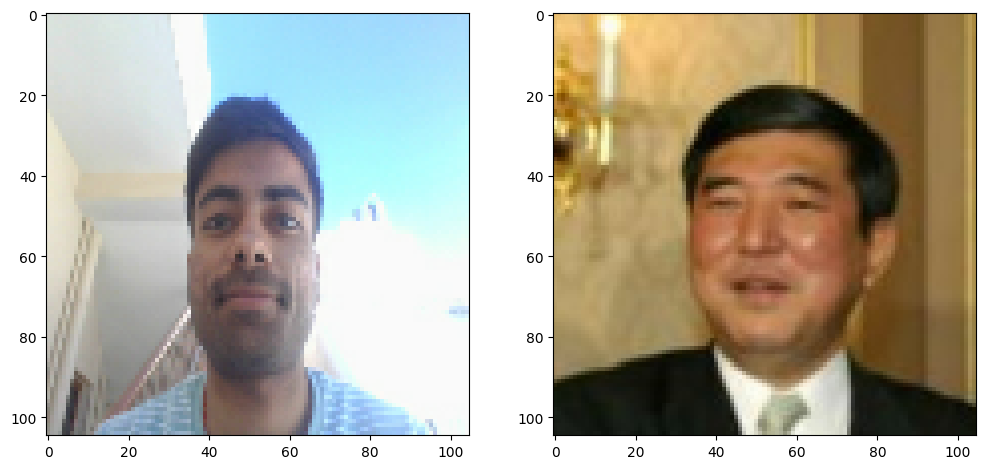

0.0


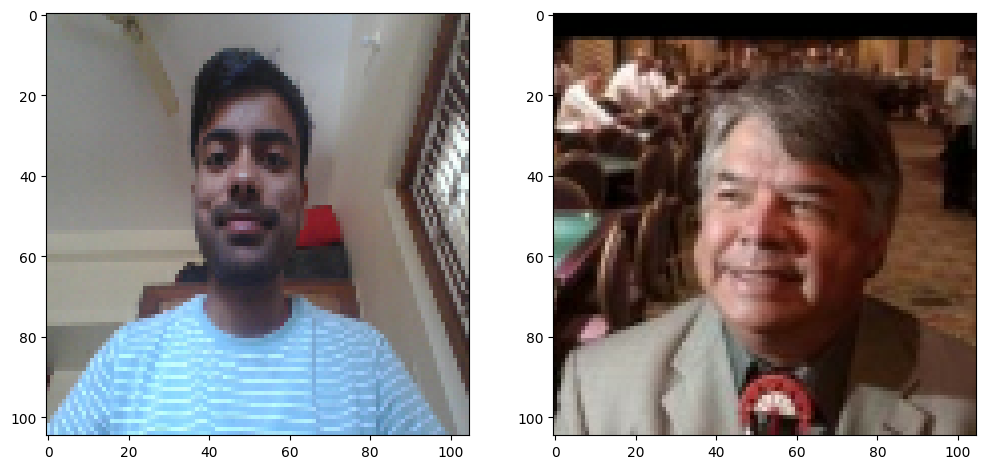

0.0


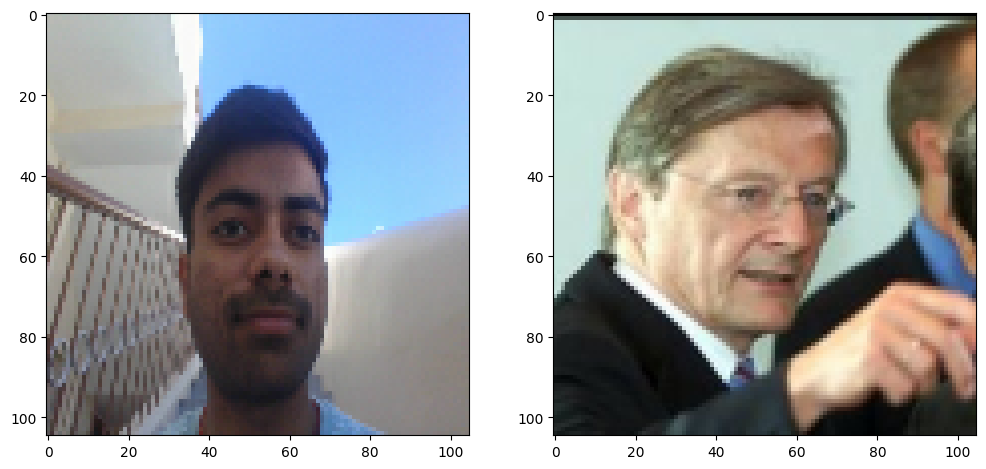

0.0


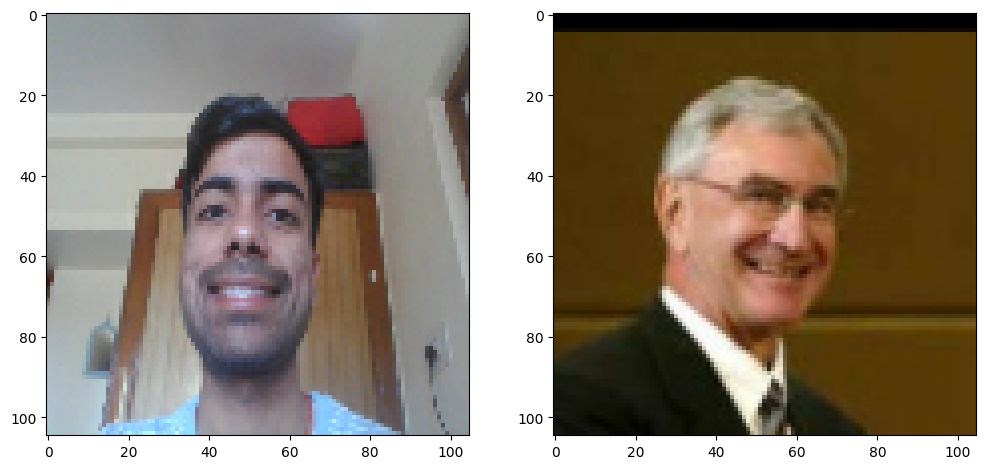

0.0


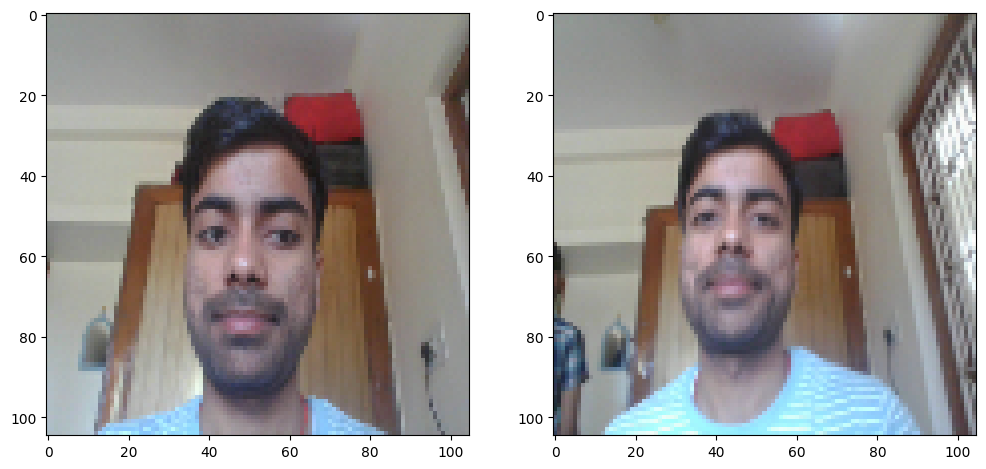

1.0


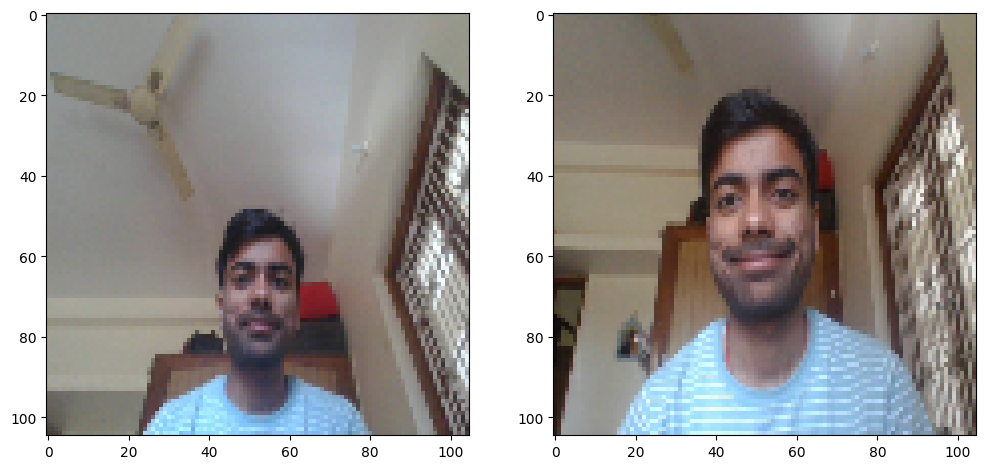

1.0


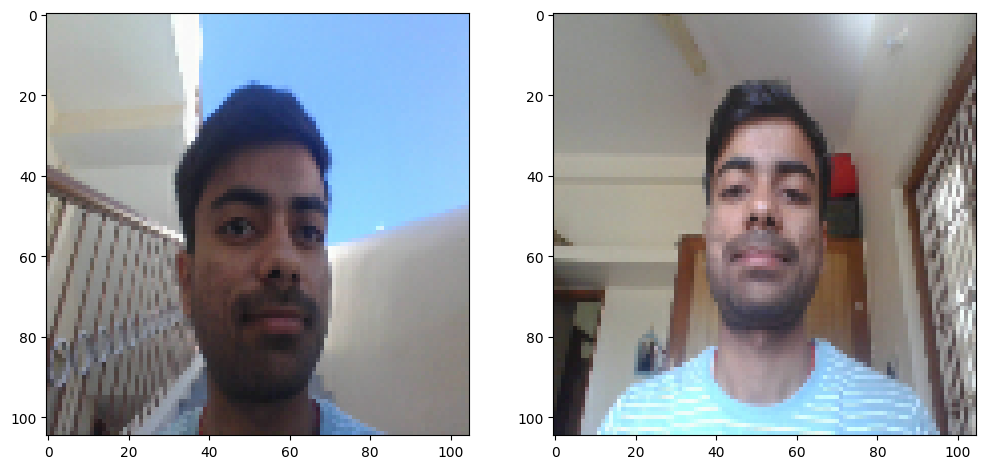

1.0


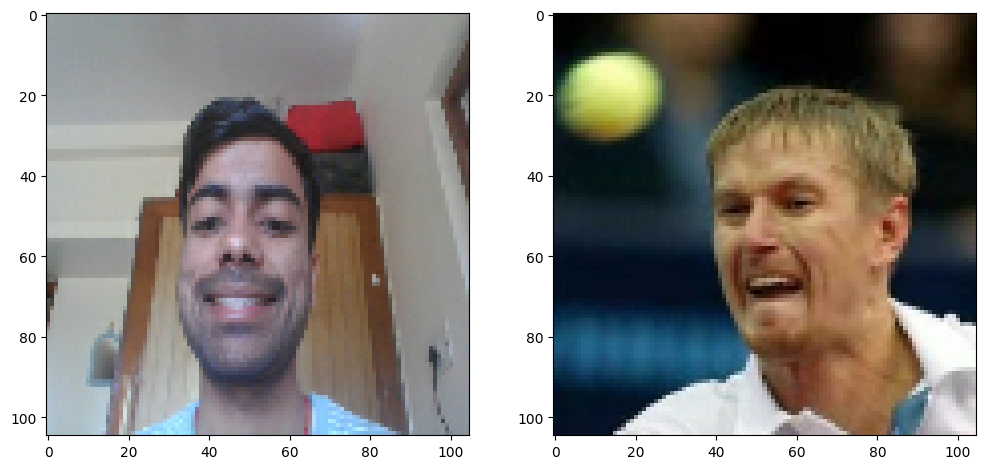

0.0


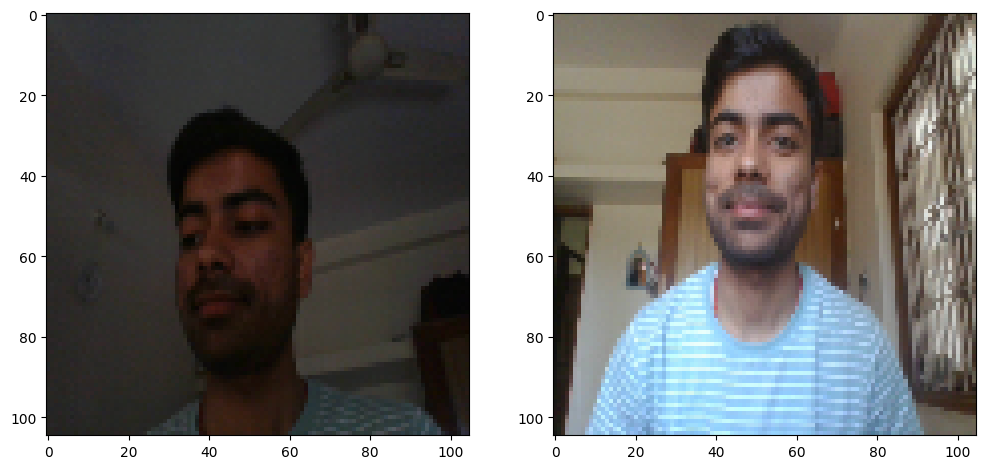

1.0


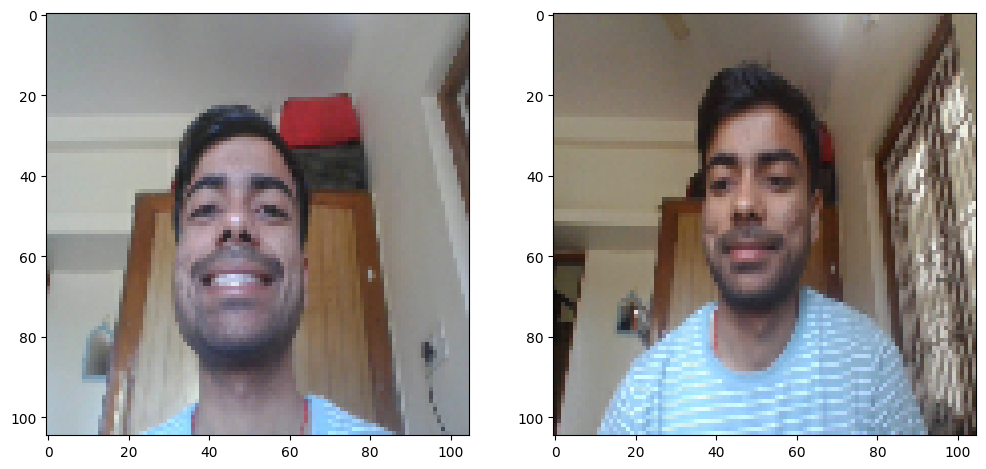

1.0


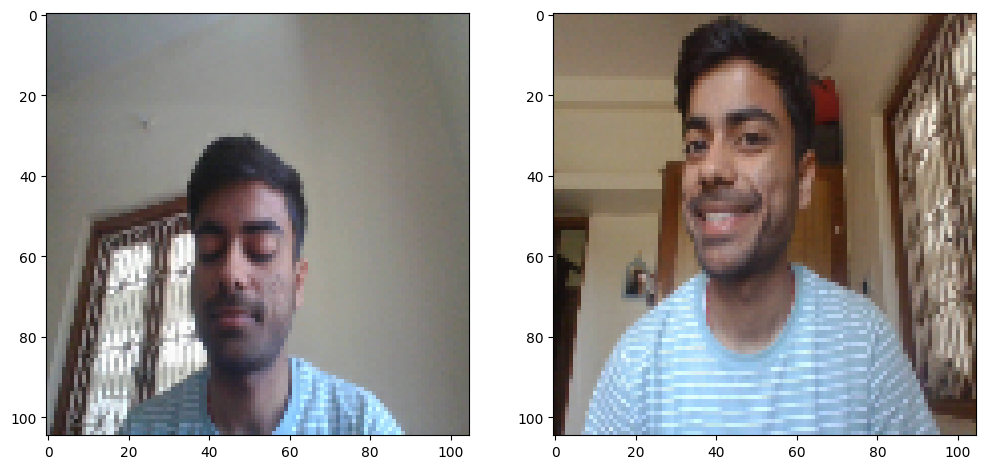

1.0


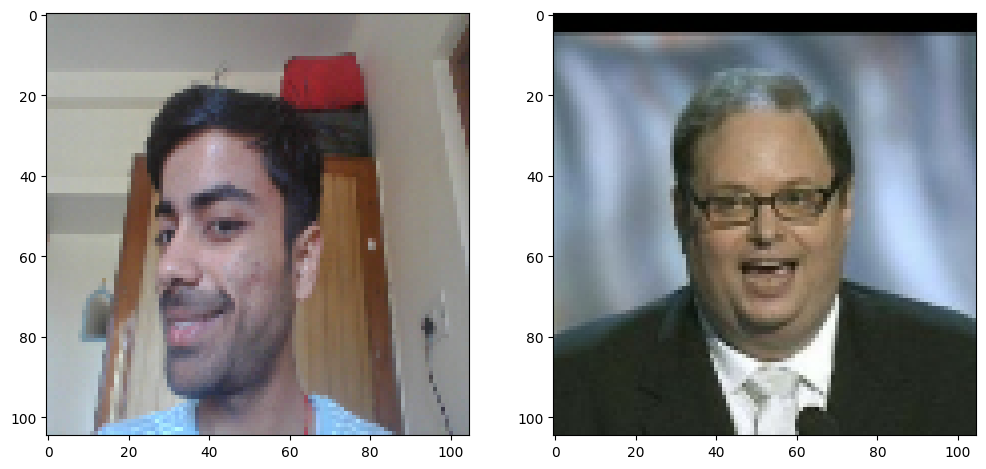

0.0


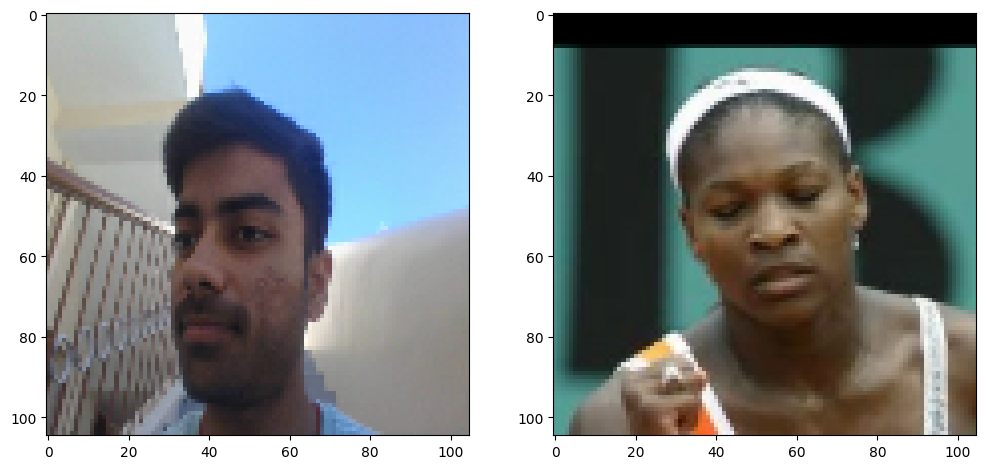

0.0


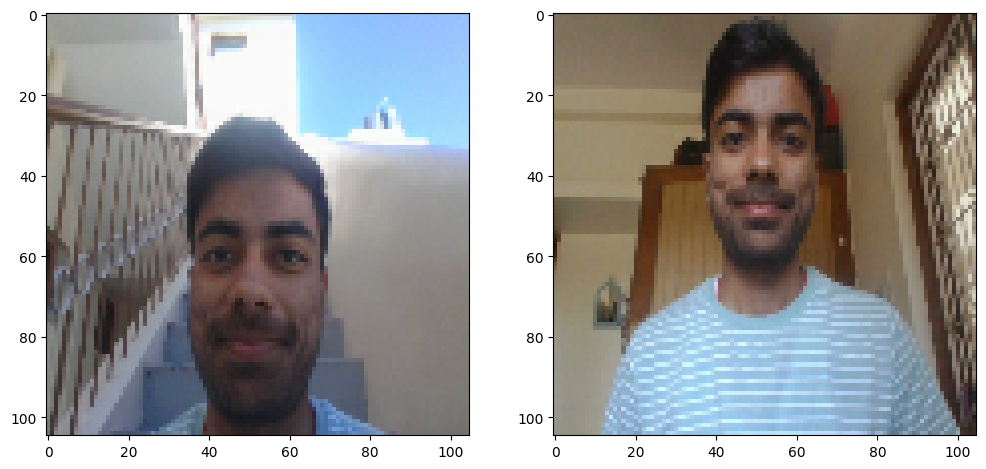

1.0


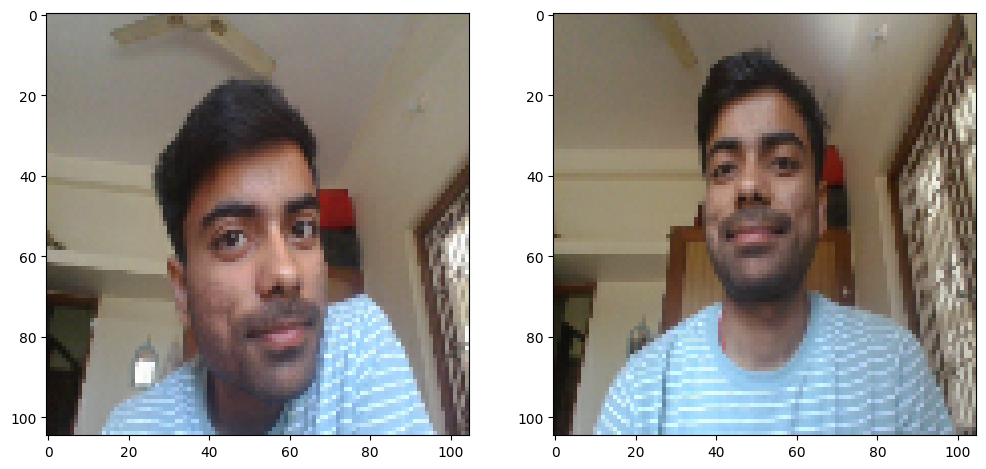

1.0


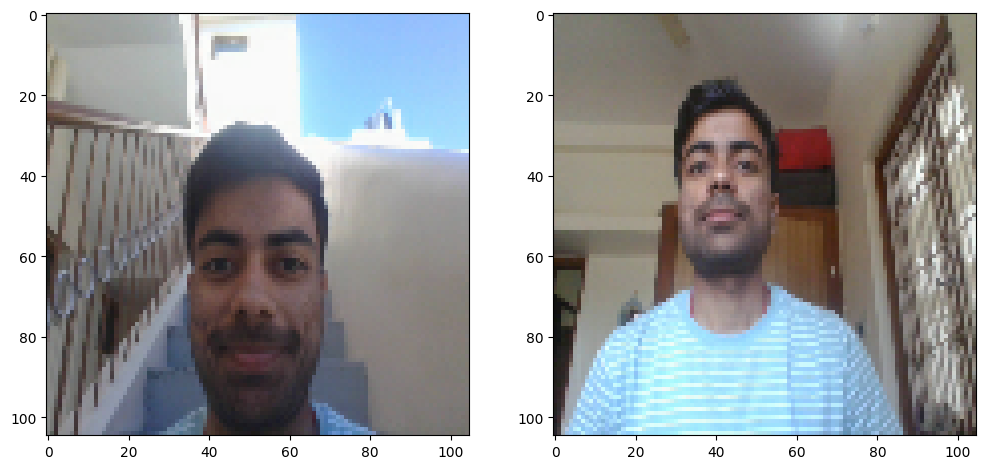

1.0


In [ ]:

for i in range(len(y_hat)):

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.imshow(test_input[i])
  plt.subplot(1,2,2)
  plt.imshow(test_val[i])
  plt.show()
  print(y_true[i])




# 7. Save Model

In [ ]:
# Save weights
save_path = os.path.join(base + 'siamesemodel.h5')
siamese_model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Reload model
siamese_model = tf.keras.models.load_model(base_path+'siamesemodel.h5',
                                   custom_objects={'L1Dist':L1Dist,'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [10]:
# Make prediction with reloaded model
siamese_model.predict([test_input, test_val])

NameError: name 'test_input' is not defined

In [11]:
# View Model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 8. Real Time Test

## 8.1 Verification Function

In [12]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Face/'

In [13]:
def verify(model, detection_threshold, verification_threshold):
  # Build results array
  results = []
  for image in os.listdir(os.path.join(base_path,'application_data','verification_images')):
    input_img = preprocess(os.path.join(base_path,'application_data','input_image','input_image.jpg'))
    validation_img = preprocess(os.path.join(base_path,'application_data','verification_images',image))

    # Make predictions
    result = model.predict(list(np.expand_dims([input_img, validation_img],axis = 1)))
    results.append(result)

  # Detection Threshold: Metric above which a prediction is considered positive
  detection = np.sum(np.array(results) > detection_threshold)

  # Verification Threshold: Proportion of positive predictions / total positive samples
  verification = detection / len(os.listdir(os.path.join(base_path,'application_data','verification_images')))
  verified = verification > verification_threshold

  return results, verified

## 8.2 OpenCV Real Time Test

In [20]:

import os
import uuid
from base64 import b64decode
from google.colab.output import eval_js
from IPython.display import display, Javascript

In [30]:
def openCV_real_time_verification(detection_threshold,verification_threshold):

  # Directory to save the input image
  save_dir = os.path.join(base_path,"application_data","input_image")
  os.makedirs(save_dir, exist_ok=True)

  try:
      num_images = 1  # Capture only one image
      for img_count in range(1, num_images + 1):
          filename = os.path.join(save_dir, 'input_image.jpg')  # Save as input_image.jpg

          # Remove the event listener to capture automatically
          js = Javascript('''
          async function takePhoto(quality) {
              return new Promise((resolve, reject) => {
                  const div = document.createElement('div');
                  const video = document.createElement('video');
                  video.style.display = 'block';
                  video.width = 250;  // Set the width of the video element
                  video.height = 250; // Set the height of the video element
                  const stream = navigator.mediaDevices.getUserMedia({video: true});

                  stream.then((stream) => {
                      document.body.appendChild(div);
                      div.appendChild(video);
                      video.srcObject = stream;
                      video.play();

                      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

                      let data = '';
                      const canvas = document.createElement('canvas');
                      canvas.width = 250;  // Set the width of the canvas
                      canvas.height = 250; // Set the height of the canvas

                      // Capture without waiting for user interaction
                      video.addEventListener('loadeddata', () => {
                          canvas.getContext('2d').drawImage(video, 0, 0, 250, 250);
                          stream.getVideoTracks()[0].stop();
                          data = canvas.toDataURL('image/jpeg', quality);
                          div.remove();
                          resolve(data); // Resolve the promise with the captured data
                      });
                  }).catch((error) => {
                      reject(error);
                  });
              });
          }
          ''')
          display(js)

          # Capture image automatically without user interaction
          try:
              data = eval_js('takePhoto({})'.format(1.0))  # Set the desired quality

              # Check if data is not None and contains the expected comma
              if data and ',' in data:
                  binary = b64decode(data.split(',')[1])
                  with open(filename, 'wb') as f:
                      f.write(binary)
                  print(f"Captured {filename}")
              else:
                  # Handle the case where no image was captured
                  print("No image was captured.")
                  break
          except Exception as e:
              print(f"Error during image capture: {e}")
              break

          # Close the camera after capturing the image
          js_close = Javascript('closeCamera();')
          display(js_close)

  except Exception as e:
      print(f"An error occurred during image capture or processing: {e}")
  finally:
      # Close the camera when capturing is done or interrupted
      js_close_all = Javascript('closeCamera();')
      display(js_close_all)

  print("Image Captured !")
  print("Real Time Verification is in progess!")
  results, verified = verify(siamese_model, detection_threshold,verification_threshold)

  # if verified:
  #   print("The person is verified")
  # else:
  #   print("The person not verified")
  detection = np.sum(np.squeeze(results) > detection_threshold)
  print(f"{detection} detected above detection threshold out of {len(os.listdir(os.path.join(base_path,'application_data','verification_images')))}")
  print()

  verification_value = detection / len(os.listdir(os.path.join(base_path,'application_data','verification_images')))
  print(f"Verification Value achived is {verification_value} and set verification threshold is {verification_threshold}")
  print()

  if verified:
    print("So, the person is successfully verified")
  else:
    print("So, the person not verified")

  # return results, verified


### Running real time verification function

In [48]:
openCV_real_time_verification(0.9,0.8)

<IPython.core.display.Javascript object>

Captured /content/drive/MyDrive/Colab Notebooks/Face/application_data/input_image/input_image.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image Captured !
Real Time Verification is in progess!
1/1 [==============================] - 0s 27ms/step
70 detected above detection threshold out of 100

Verification Value achived is 0.7 and set verification threshold is 0.8

So, the person not verified


In [27]:
np.sum(np.squeeze(results) > 0.7)


NameError: name 'results' is not defined

In [ ]:
39 / 50

0.78